#### Loading all the necessary Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

 Data is already splitted into train and test sets. Creating a validation set by selecting 10000 samples from the training set (at the end we will have 10000 training and 50000 validation samples). Displaying a few images

#### Loading the training and the testing dataset

In [3]:
ftrain=pd.read_csv("fashion-mnist_train.csv")
ftrain.shape

(60000, 785)

In [4]:
ftest=pd.read_csv("fashion-mnist_test.csv")

In [5]:
ftrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting the dataset into training and testing and scaling the dataset

In [6]:
x_train=ftrain.drop(columns="label")
x_train=x_train/255.0
y_train=ftrain.iloc[:,0]
y_train=pd.DataFrame(y_train)
y_train

,label
0,2
1,9
2,6
3,0
4,3
...,...
59995,9
59996,1
59997,8
59998,8


In [7]:
x_test=ftest.drop(columns="label")
x_test=x_test/255.0
y_test=ftest.iloc[:,0]
y_test=pd.DataFrame(y_test)
y_test

,label
0,0
1,1
2,2
3,2
4,3
...,...
9995,0
9996,6
9997,8
9998,8


#### Splitting the training dataset into validation and training dataset

In [8]:
X_val,X_train, y_val, y_train = x_train[:10000], x_train[10000:], y_train[:10000], y_train[10000:]

In [27]:
y_train.head()

,label
10000,2
10001,4
10002,8
10003,6
10004,7


In [28]:
type(y_train)

pandas.core.frame.DataFrame

In [10]:
X_val.shape

(10000, 784)

#### PCA for SVM  as we are preserving the 95% of the original dataset

In [11]:
pca_trans = PCA(0.95)
X_trainpca= pca_trans.fit_transform(X_train)
X_valpca = pca_trans.transform(X_val)
X_testpca= pca_trans.transform(x_test)

#### Displaying some images as asked in the question

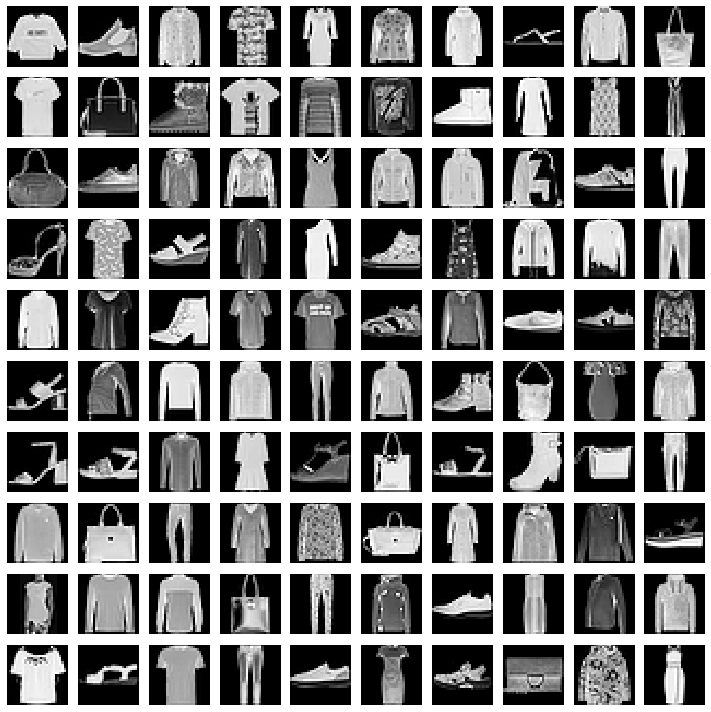

In [34]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train.iloc[i].values.reshape(28,28), cmap="gray", interpolation="nearest")
    plt.axis("off")
plt.tight_layout()
plt.show()

### Multinomial Logistic Regression (softmax regression) 

In [35]:
softreg = LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000, C=10, random_state=42)
softreg.fit(X_train, y_train.values.ravel())
print("Training Score",softreg.score(X_train,y_train))
print("Validation Score",softreg.score(X_val,y_val))

Training Score 0.88622
Validation Score 0.8482


In [36]:
softreg = LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000, C=1, random_state=42)
softreg.fit(X_train, y_train.values.ravel())
print("Training Score",softreg.score(X_train,y_train))
print("Validation Score",softreg.score(X_val,y_val))

Training Score 0.88328
Validation Score 0.8541


In [37]:
softreg = LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000, C=0.1, random_state=42)
softreg.fit(X_train, y_train.values.ravel())
print("Training Score",softreg.score(X_train,y_train))
print("Validation Score",softreg.score(X_val,y_val))

Training Score 0.87304
Validation Score 0.8594


In [38]:
softreg = LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000, C=0.01, random_state=42)
softreg.fit(X_train, y_train.values.ravel())
print("Training Score",softreg.score(X_train,y_train))
print("Validation Score",softreg.score(X_val,y_val))

Training Score 0.85442
Validation Score 0.8514


#### There is not much impact with the inverse regularization coefficient. However with some weak regularization of C=0.1, we our getting the best model with hyperparameters of c=0.1, max_iter=1000, Training Score of 0.87304 and Validation score of 0.8594.

#### From the table, we can see that as the value of C increases (corresponding to decrease in regularization coefficient), the validation score doesn't improve, but the training score improves indicating that the model is somewhat overfitting on the training data.

####                                             Results for Softmax Regression
| Value of C| Maximum Iterations | Training Score| Validation Score|
|-----------|--------------------|----------------|----------------|
    0.001   |       1000         |0.81864         |0.8195
    0.01    |       1000         |0.85442         |0.8514
    0.1     |       1000         |0.87304         |0.8594
    1       |       1000         |0.88328         |0.8541
    10      |       1000         |0.88622         |0.8482
    100     |       1000         |0.88724         |0.8456

### Support Vector Machine

#### Linear Kernel with different hyperparameters

In [41]:
c=[0.01,0.1,1,10,100]
for i in c:
    svm=SVC(kernel="linear",C=i,max_iter=1000,tol=0.01)
    svm.fit(X_trainpca,y_train.values.ravel())
    print("Training Score of SVM with Linear Kernel with c",i,"is",svm.score(X_trainpca,y_train.values.ravel()))
    print("Validation Loss of SVM with Linear Kernel with c",i,"is",svm.score(X_valpca,y_val.values.ravel()))

Training Score of SVM with Linear Kernel with c 0.01 is 0.72268
Validation Loss of SVM with Linear Kernel with c 0.01 is 0.7216
Training Score of SVM with Linear Kernel with c 0.1 is 0.78514
Validation Loss of SVM with Linear Kernel with c 0.1 is 0.7837
Training Score of SVM with Linear Kernel with c 1 is 0.65118
Validation Loss of SVM with Linear Kernel with c 1 is 0.6469
Training Score of SVM with Linear Kernel with c 10 is 0.5353
Validation Loss of SVM with Linear Kernel with c 10 is 0.5339
Training Score of SVM with Linear Kernel with c 100 is 0.53848
Validation Loss of SVM with Linear Kernel with c 100 is 0.5351


- For Linear Kernel we are getting the best hyperparameter with c=0.1, with training score of 0.78 and validation score of 0.78 as well. There seems no overfitting in the data as validation and training score increase/decrease together. When we increase regularization parameter till 0.1 both the training and validation score increase and above 0.1, both of them decrease.


#### Polynomial Kernel

- Here we have tried different combinations of regularization constants c [0.01,0.1,1,10,100] and degrees [2,3,4] with scaling factors in gamma as 'gamma': ['auto', 'scale']

In [59]:
import itertools
c=[0.01,0.1,1,10,100]
degree=[2,3,4]
params = {
    'C':[0.01,0.1,1,10,100],
    'Degree':[2,3,4],
    'gamma': ['auto', 'scale']
}
v = params.values()
combinations = list(itertools.product(*v))
for c in combinations:
    svm=SVC(kernel="poly",C=c[0],max_iter=1000,degree=c[1], gamma=c[2])
    svm.fit(X_trainpca,y_train.values.ravel())
    print("For C =", c[0], "Degree =", c[1], "Gamma =", c[2])
    print("Training Score of SVM with Poly Kernel =", svm.score(X_trainpca,y_train.values.ravel()))
    print("Validation Score of SVM with Poly Kernel =",svm.score(X_valpca,y_val.values.ravel()))
    

For C = 0.01 Degree = 2 Gamma = auto
Training Score of SVM with Poly Kernel = 0.36554
Validation Score of SVM with Poly Kernel = 0.3682
For C = 0.01 Degree = 2 Gamma = scale
Training Score of SVM with Poly Kernel = 0.46054
Validation Score of SVM with Poly Kernel = 0.4614
For C = 0.01 Degree = 3 Gamma = auto
Training Score of SVM with Poly Kernel = 0.4299
Validation Score of SVM with Poly Kernel = 0.4321
For C = 0.01 Degree = 3 Gamma = scale
Training Score of SVM with Poly Kernel = 0.49968
Validation Score of SVM with Poly Kernel = 0.4976
For C = 0.01 Degree = 4 Gamma = auto
Training Score of SVM with Poly Kernel = 0.25252
Validation Score of SVM with Poly Kernel = 0.2502
For C = 0.01 Degree = 4 Gamma = scale
Training Score of SVM with Poly Kernel = 0.34264
Validation Score of SVM with Poly Kernel = 0.3437
For C = 0.1 Degree = 2 Gamma = auto
Training Score of SVM with Poly Kernel = 0.49894
Validation Score of SVM with Poly Kernel = 0.5007
For C = 0.1 Degree = 2 Gamma = scale
Training S

- When we are using gamma=scale we are getting more accuracy as compared to auto because the influence now depends inversely on the variance of the input training data as well rather than only on the number of features, indicating that the model fits better to the training data.
- For small values of C, the model imposes heavy regularization on the weights and the model doesn't fit well to the training data and thus doesn't perform well on the validation data. For large C, the regularization effect is reduced and the model fits better on the training data and performs better on the validation set.
- For optimal values of C and Gamma, as the number of degrees are increased the accuracy also increases as the model is now able to capture even the non-linear realtionship between the features.
- The best result we are getting in case for poly is for C = 100 Degree = 4 Gamma = scale with Training Score of SVM with Poly Kernel = 0.90718 and Validation Score of SVM with Poly Kernel = 0.8419

#### RBF Kernel

In [43]:
c=[0.01,0.1,1,10,100]
for i in c:
    svm=SVC(kernel="rbf",C=i,max_iter=1000)
    svm.fit(X_trainpca,y_train.values.ravel())
    print("Training Score of SVM with rbf Kernel with c",i,"is",svm.score(X_trainpca,y_train.values.ravel()))
    print("Validation Score of SVM with rbf Kernel with c",i,"is",svm.score(X_valpca,y_val.values.ravel()))

Training Score of SVM with rbf Kernel with c 0.01 is 0.6441
Validation Score of SVM with rbf Kernel with c 0.01 is 0.648
Training Score of SVM with rbf Kernel with c 0.1 is 0.73848
Validation Score of SVM with rbf Kernel with c 0.1 is 0.7436
Training Score of SVM with rbf Kernel with c 1 is 0.87834
Validation Score of SVM with rbf Kernel with c 1 is 0.8575
Training Score of SVM with rbf Kernel with c 10 is 0.8976
Validation Score of SVM with rbf Kernel with c 10 is 0.8571
Training Score of SVM with rbf Kernel with c 100 is 0.89014
Validation Score of SVM with rbf Kernel with c 100 is 0.8451


- Here the value of C is really important to have a bargain between overfitting and underfitting. As we increase the value of c(decreasing regularization effect as it is inverse), here the  validation score starts to decreases (even though the training score increases) after it has reached it peak at C=1. Thus, we can say that for C>1, the model starts overfitting on the training set, evident from the poor validation score.
- We are getting a highest validation score for c=1(weak regularization) in RBF kernel with score as 0.8575 on validation and 0.87 as training score, indicate the model is working well with no overfitting.

### Random Forest

- Here we have used different choices of hyperparameters such as  'estimator': [100, 200, 500]  'max_features': ["sqrt", "log2", None]  , 'max_depth': [50, 100, 500],  'max_leaf_nodes': [10, 20, 30], to identify the best model and use it later on our test data.

In [60]:
d={} # for storing the results of different hyperparameters

In [61]:
import itertools

hyper_params = {
    'estimator': [100, 200, 500],
    'max_features': ["sqrt", "log2", None],
    'max_depth': [50, 100, 500],
    'max_leaf_nodes': [10, 20, 30]
}
v = hyper_params.values()
combinations = list(itertools.product(*v))
for c in combinations:
    rfc = RandomForestClassifier(n_estimators=c[0], max_features=c[1], max_depth=c[2], max_leaf_nodes=c[3], n_jobs=-1)
    rfc.fit(X_train, y_train.values.ravel())
    cc = (str(v) for v in c)
    d["rfc " + " ".join(cc)] = [rfc.score(X_train, y_train.values.ravel()), rfc.score(X_val, y_val.values.ravel())]

In [62]:
d

{'rfc 100 sqrt 50 10': [0.7392, 0.7405],
 'rfc 100 sqrt 50 20': [0.7861, 0.7864],
 'rfc 100 sqrt 50 30': [0.79886, 0.8026],
 'rfc 100 sqrt 100 10': [0.7374, 0.736],
 'rfc 100 sqrt 100 20': [0.786, 0.7859],
 'rfc 100 sqrt 100 30': [0.79788, 0.8],
 'rfc 100 sqrt 500 10': [0.73806, 0.7365],
 'rfc 100 sqrt 500 20': [0.7862, 0.7868],
 'rfc 100 sqrt 500 30': [0.79586, 0.798],
 'rfc 100 log2 50 10': [0.72366, 0.7262],
 'rfc 100 log2 50 20': [0.77666, 0.7752],
 'rfc 100 log2 50 30': [0.79742, 0.797],
 'rfc 100 log2 100 10': [0.72418, 0.7239],
 'rfc 100 log2 100 20': [0.78338, 0.7817],
 'rfc 100 log2 100 30': [0.79602, 0.7941],
 'rfc 100 log2 500 10': [0.7311, 0.7334],
 'rfc 100 log2 500 20': [0.78094, 0.7796],
 'rfc 100 log2 500 30': [0.79508, 0.7944],
 'rfc 100 None 50 10': [0.68356, 0.69],
 'rfc 100 None 50 20': [0.74924, 0.7496],
 'rfc 100 None 50 30': [0.77346, 0.7727],
 'rfc 100 None 100 10': [0.68254, 0.688],
 'rfc 100 None 100 20': [0.74986, 0.7504],
 'rfc 100 None 100 30': [0.77136, 0.

- We noticed that as we increase the number of max_leaf nodes here the validation scores increases as it lets tree to dive deeper and make more complex decisions ultimatley increasing the accuracy.
- The maximum depth hyperparameter, max_depth doesn't have much impact on the model's performance as both the training and validation accuracy are more or less same for different max_depth values, but high max_depth drastically increases the training time of the model.
- The max_features hyperparameter has a significant impact on the model's performance and the model does better for max_features = 'sqrt', i.e. the tree has to look at only at sqrt(n) features at each node to find the best feature to split the node. For max_features = None, the model looks at all the features but doesn't fit well to the training data as the images have border pixel values 0, which don't have any importance as compared to the center pixels. Large values of max_features increases the training time as well.
- The number of decision trees, i.e. n_estimators feature doesn't have any considerable impact as 100 decision trees have approximately same accuracy as that of 500 estimators, indicating that the model is converging even with small number of decision trees. By consderable impact, we mean that small number of trees is sufficient for the model to fit the training data well.
- With the right balance we find out the best model for our random forest with hyperparameters n_estimators=100, max_features='sqrt', max_depth=50 and max_leafnodes=30': [training score 0.79886, validation score 0.8026] which are nearly equal and suitable for our dataset and does not signal overfitting or underfitting. Hence it is able to generalize well on the validation set.


### Analyzing Feature Importance

In [65]:
rfc1 = RandomForestClassifier(n_estimators=100, max_features="sqrt", max_depth=50, max_leaf_nodes=30, n_jobs=-1)
rfc1.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, max_leaf_nodes=30, n_jobs=-1)

In [74]:
array1=rfc1.feature_importances_
array1 = np.expand_dims(array1,axis=1)


In [79]:
array1.shape

(784, 1)

<AxesSubplot:>

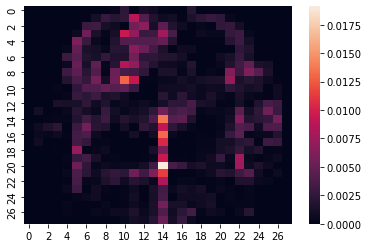

In [80]:
sns.heatmap(array1.reshape((28,28)))

- In analyzing feature importance the centre of the image or pixel(white spot in above heat map) seem to be more important as it is the core of distinguishing images from one another rather than the borders which can be seen black in the above heat map.
- It also shows that most of the relevant information of each image is concentrated in the center pixels rather than the border pixels.

#### Ensemble Different Classifiers 

#### Then,  combine  your  classifiers  into an  ensemble  that outperforms  each  individual  classifier  on  the validation set. Once you have found one, try it on the test set. Describe and discuss your findings. 

###### Hard Voting Classifier

In [98]:
from sklearn.ensemble import VotingClassifier
bestsoftmaxreg=LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000, C=0.1, random_state=4)
bestsvm=SVC(kernel="rbf",C=1,max_iter=1000)
bestrfc=RandomForestClassifier(n_estimators=100, max_features="sqrt", max_depth=50, max_leaf_nodes=30, n_jobs=-1)
voting_clf = VotingClassifier(
estimators=[('lr', bestsoftmaxreg), ('rf', bestrfc), ('svc', bestsvm)],
voting='hard')
voting_clf.fit(X_trainpca, y_train.values.ravel())


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, max_iter=1000,
                                                 multi_class='multinomial',
                                                 random_state=4)),
                             ('rf',
                              RandomForestClassifier(max_depth=50,
                                                     max_leaf_nodes=30,
                                                     n_jobs=-1)),
                             ('svc', SVC(C=1, max_iter=1000))])

In [86]:
from sklearn.metrics import accuracy_score
for clf in (bestsoftmaxreg, bestrfc, bestsvm, voting_clf):
    clf.fit(X_trainpca, y_train)
    y_pred = clf.predict(X_valpca)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

LogisticRegression 0.8584
RandomForestClassifier 0.7795
SVC 0.8575
VotingClassifier 0.8671


- We can see that our voting classifier outperforms each individual classifier giving us the highest accuracy of 0.86 out of the all other classifiers which we selected. This shows that ensembling increases the performance of weak learners by taking a vote of multiple individual classifiers before classifying the instances to the classes.

### Soft Voting Classifier

In [87]:
bestsvm1=SVC(kernel="rbf",C=1,max_iter=1000,probability=True)## setting prob as true for soft voting
voting_clf = VotingClassifier(
estimators=[('lr', bestsoftmaxreg), ('rf', bestrfc), ('svc', bestsvm1)],
voting='soft')
voting_clf.fit(X_trainpca, y_train.values.ravel())


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, max_iter=1000,
                                                 multi_class='multinomial',
                                                 random_state=4)),
                             ('rf',
                              RandomForestClassifier(max_depth=50,
                                                     max_leaf_nodes=30,
                                                     n_jobs=-1)),
                             ('svc',
                              SVC(C=1, max_iter=1000, probability=True))],
                 voting='soft')

In [88]:
from sklearn.metrics import accuracy_score
for clf in (bestsoftmaxreg, bestrfc, bestsvm1, voting_clf):
    clf.fit(X_trainpca, y_train)
    y_pred = clf.predict(X_valpca)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

LogisticRegression 0.8584
RandomForestClassifier 0.7818
SVC 0.8575
VotingClassifier 0.8674


- In Soft Voting too the classifier outperforms other classifer giving us an accuracy of 0.86 which is highest of all the classifiers which we selected.
- Soft voting performs slightly better than the hard voting as now the ensemble decides the class of instances based on the probability scores of individual classifiers rather than their final decision of predicted class. 

### Predicting on our Test Data

- SoftMax

Accuracy on the Testing Data 0.8571


<AxesSubplot:>

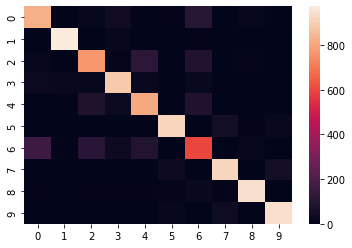

In [101]:
bestsoftmaxreg=LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000, C=0.1, random_state=42)
bestsoftmaxreg.fit(X_train,y_train)
ypred=bestsoftmaxreg.predict(x_test)
print("Accuracy on the Testing Data",bestsoftmaxreg.score(x_test,y_test))
confusionmat=confusion_matrix(y_test,ypred)
sns.heatmap(confusionmat)

- SVM

Accuracy on the Testing Data 0.8583


<AxesSubplot:>

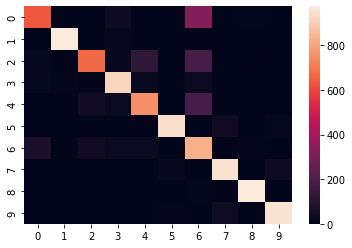

In [102]:
bestsvm=SVC(kernel="rbf",C=1,max_iter=1000)
bestsvm.fit(X_trainpca,y_train)
ypred=bestsvm.predict(X_testpca)
print("Accuracy on the Testing Data",bestsvm.score(X_testpca,y_test))
confusionmat=confusion_matrix(y_test,ypred)
sns.heatmap(confusionmat)

- Random Forest

Accuracy on the Testing Data 0.7931


<AxesSubplot:>

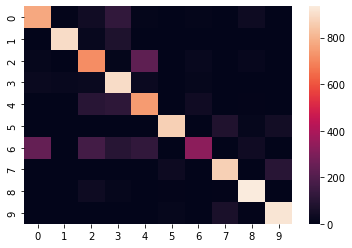

In [103]:
bestrfc=RandomForestClassifier(n_estimators=100, max_features="sqrt", max_depth=50, max_leaf_nodes=30, n_jobs=-1)
bestrfc.fit(X_train,y_train)
ypred=bestrfc.predict(x_test)
print("Accuracy on the Testing Data",bestrfc.score(x_test,y_test))
confusionmat=confusion_matrix(y_test,ypred)
sns.heatmap(confusionmat)

- Hard Voting Classifier

Accuracy on the Testing Data 0.8662


<AxesSubplot:>

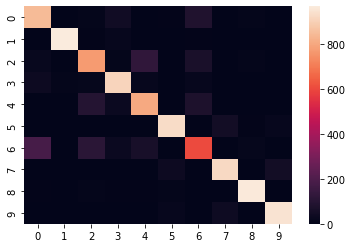

In [104]:
ypred=voting_clf.predict(X_testpca)
print("Accuracy on the Testing Data",voting_clf.score(X_testpca,y_test))
confusionmat=confusion_matrix(y_test,ypred)
sns.heatmap(confusionmat)

- From the above plots of confusion matrix, we can see that the misclassification(non-diagonal) rate is minimal as compared to the the number of instances that are classified correctly(diagonal) showing that the model generalizes well even on the test set.
- Comparing the confusion matrix plots of ensemble with individual classifiers, we can see that misclassification in test is further reduced with ensembling, yet another proof that ensemble outperforms each individual classifier.